# Evaluating Dynamic NMF model

In [5]:
import joblib
import pandas as pd

%matplotlib inline
from plotnine import ggplot, aes, geoms, theme, ggtitle, ylim, xlim, ylab
from plotnine import element_blank, element_line, element_text, scales, annotate



In [6]:
speeches = pd.read_csv('All_speeches_labelled.csv')

with open('Official_TopicModel_95k.pkl','rb') as File:
    models = joblib.load(File)

### Investigating NaN topic speeches and procedural

#### 1. Look at window topic terms for NaN

In [11]:
NA_terms = models['mapper'].loc[models['mapper'].dynamic_label == 'NA']

for terms in NA_terms.window_terms:
    print(terms,end='\n\n')

['system', 'space', 'satellite', 'transportation', 'rail', 'railroad_retirement', 'air', 'railroad', 'capability', 'develop']

['problem', 'solution', 'solve', 'select_committee', 'face', 'many', 'drug', 'immigration', 'difficult', 'situation']

['problem', 'hunger', 'many', 'concern', 'solve', 'select_committee', 'area', 'face', 'border', 'immigration']

['system', 'test', 'identification', 'use', 'interstate', 'study', 'rail', 'national', 'organ', 'bankruptcy']

['good', 'job', 'hope', 'one', 'part', 'lot', 'idea', 'more', 'israel', 'interest']

['system', 'farm_credit', 'asat', 'satellite', 'test', 'bank', 'mobile', 'deploy', 'capability', 'infrastructure']

['problem', 'face', 'solve', 'solution', 'concern', 'cause', 'help', 'today', 'many', 'create']

['system', 'farm_credit', 'controller', 'borrower', 'interest_rate', 'sdi', 'capital', 'transportation', 'study', 'river']

['problem', 'face', 'solution', 'solve', 'many', 'real', 'create', 'area', 'concern', 'crisis']

['highway', 

Looks like there are a good number of topics that deal with infrastructure in this NaN dynamic topic. How many speeches are attributed to NaN?

In [22]:
print(f"{(len(speeches.loc[speeches.dynamic_label.isnull()])/len(speeches))*100:2f}% of speeches are null labelled")

3.714160% of speeches are null labelled


### Procedural

In [25]:
NA_terms = models['mapper'].loc[models['mapper'].dynamic_label.str.contains('procedural')]
for terms in NA_terms.window_terms:
    print(terms,end='\n\n')

['side', 'gentleman_yield', 'minority', 'republican', 'party', 'objection', 'discussion', 'accept', 'oclock', 'argument']

['change', 'correct', 'number', 'technical', 'amend', 'propose', 'staff', 'transcript', 'reflect', 'formula']

['request', 'minority', 'objection', 'amount', 'supplemental', 'permit', 'additional', 'further', 'unanimous_consent', 'understanding']

['give', 'opportunity', 'assurance', 'deny', 'help', 'review', 'speak', 'more', 'great', 'able']

['way', 'fact', 'kind', 'suggest', 'find', 'seem', 'reason', 'same', 'particular', 'happen']

['like', 'understand', 'correct', 'understanding', 'word', 'speak', 'chairman_subcommittee', 'colloquy', 'clarify', 'move_strike']

['hope', 'today', 'good', 'able', 'more', 'future', 'many', 'business', 'expect', 'full']

['provision', 'include', 'require', 'authority', 'withholding', 'secretary', 'such', 'contain', 'waiver', 'repeal']

['support', 'believe', 'effort', 'full', 'rise_strong', 'position', 'rise_support', 'include', 'p

These are all definitely nonsense or procedural topics. So this is good. How many speeches are of this type though?

In [30]:
speeches = speeches.loc[-speeches.dynamic_label.isnull()]

In [31]:
print(f"{(len(speeches.loc[speeches.dynamic_label.str.contains('procedural')])/len(speeches))*100:2f}% of speeches are procedural labelled")

15.504061% of speeches are procedural labelled


Yikes, thats quite a lot of speeches...

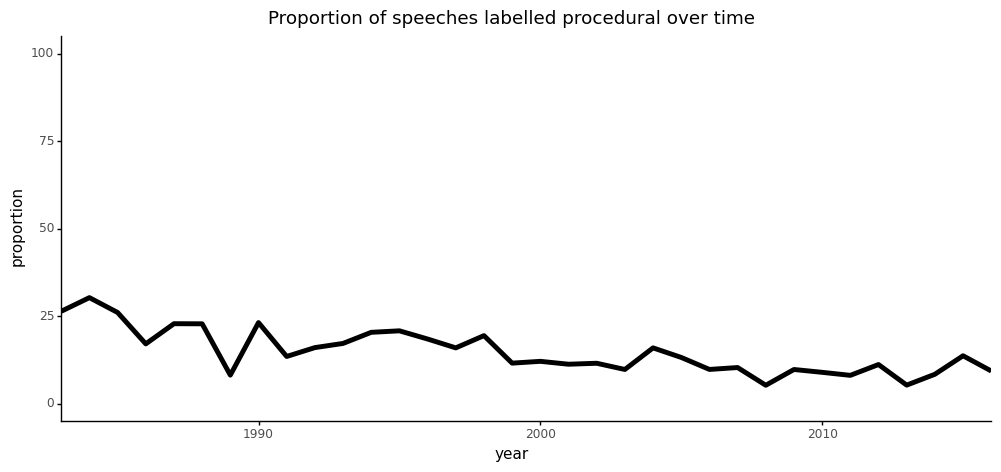

<ggplot: (-9223363243645535884)>

In [50]:
speeches['year'] = pd.to_datetime(speeches.date).dt.year
yearly_count = speeches.groupby(['year','dynamic_label']).agg({'party_x':'count'})
prop_speeches = yearly_count.groupby(level=0).apply(lambda x: 100*x/float(x.sum())).reset_index()

procedural_props = prop_speeches.loc[prop_speeches.dynamic_label.str.contains('procedural')].groupby('year').sum().reset_index()

(
    ggplot(procedural_props,aes(x='year',y='party_x')) + 
    geoms.geom_line(size=2) +
    theme(panel_background=element_blank(),
          axis_line=element_line(),
          figure_size=(12,5)
         ) +
    ylim(0,100) + 
    scales.scale_x_continuous(expand=(0,0)) +
    ylab('proportion') +
    ggtitle('Proportion of speeches labelled procedural over time')
)